In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Creating the concept to visualize

Since the objective of this analysis is to undestand the mortality effect and its sub-effects as shown in other Jupyer Notebook, it would be the first though to try to get the percent of animals that died while testing or how many animals died.

The ECOTOX base doesn't have a way to give this info. A extensive study has been made, but since its a test data compiled, its hard to get this all together. Considering this, will be considered another way to undestand the values. The Appendix T at ```https://cfpub.epa.gov/ecotox/pdf/codeappendix.pdf``` will show the Ecotox Endpoints that explain each value possible. The Mortaliy Effect and the Mortality Measurement has this specification:

```
Death
Effect expressed as % death or % survival. A lethal effect may describe mortality (MORT) or an observed behavior that indicates mortality (e.g., shell valve closures for bivalves (VACL), immobilization (IMBL) for invertebrates, or detachment (DTCH) for sessile organisms). "MORT" differs from "ABND" in that an initial number of organisms is known for the mortality effect and results are expressed in terms of the initial number (e.g., percent survival).
If the author defines criteria used to determine that the organism was dead, and then identifies the effect as a lethal effect, "MORT" will be coded in the EFFECT field. MORT may be coded as an effect with LC, EC, LD, NOEC, or LOEC endpoints.
If authors report hatch data where the intitial life stage is eggs, code the hatch data as mortality with a measurement comment AS HATCH. If the initial life stage is not eggs or is a life-cycle study where hatch is measured on a future generation, code the hatch data as REP HTCH
```

As can be seen, there isn't a unique value easy to understant and can mean  % death, % survival, have a endpoint as Lethal concentration to xx% of test animals.

With that data base knowlodge will be considered asolute numbers of Measurements directly linked to mortality, as:

DTTM
Death with tumors
Mortalities that occurred with tumors.

TKNO
Knockdown
The inability to fly or stand

MORT
Mortality

In [20]:
df = pd.read_csv("table.csv", dtype='unicode')
#df = df.drop(['Unnamed:'], axis=1)
df.iloc[:5]

,Unnamed: 0,test_id,test_cas,organism_lifestage,species_number,organism_age_mean,organism_gender,study_duration_mean,exposure_duration_mean,test_type,...,cas_number,chem_name,formulation,chemical_name,common_name,kingdom,class,tax_order,family,species
0,0,13,50293,NR,5022,NR,NR,8,8,NC,...,67641,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
1,1,13,50293,NR,5022,NR,NR,8,8,NC,...,67641,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
2,2,13,50293,NR,5022,NR,NR,8,8,NC,...,67641,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
3,3,13,50293,NR,5022,NR,NR,8,8,NC,...,67641,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
4,4,13,50293,NR,5022,NR,NR,8,8,NC,...,67641,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma


In [23]:
mortality_code = ['DTTM', 'TKNO', 'MORT']
mortality_code

['DTTM', 'TKNO', 'MORT']

In [51]:
n = df.query('effect == "MOR"')

new_df = n.query('measurement == "' + mortality_code[0] + '"')
print(new_df.shape)
for i in mortality_code[1:]:
    new_df = new_df.append(n.query('measurement == "' + i + '"'))

new_df

(0, 37)


,Unnamed: 0,test_id,test_cas,organism_lifestage,species_number,organism_age_mean,organism_gender,study_duration_mean,exposure_duration_mean,test_type,...,cas_number,chem_name,formulation,chemical_name,common_name,kingdom,class,tax_order,family,species
145270,145270,532106,10453868,AD,1077,3,NR,NC,NaN,NC,...,67641,2-Propanone,NC,2-Propanone,Mosquito,Animalia,Insecta,Diptera,Culicidae,pipiens
145271,145271,532107,10453868,AD,1077,3,NR,NC,NaN,NC,...,67641,2-Propanone,NC,2-Propanone,Mosquito,Animalia,Insecta,Diptera,Culicidae,pipiens
145275,145275,532115,52645531,AD,1077,3,NR,NC,NaN,NC,...,67641,2-Propanone,NC,2-Propanone,Mosquito,Animalia,Insecta,Diptera,Culicidae,pipiens
145276,145276,532116,52645531,AD,1077,3,NR,NC,NaN,NC,...,67641,2-Propanone,NC,2-Propanone,Mosquito,Animalia,Insecta,Diptera,Culicidae,pipiens
1629936,1629936,556175,52645531,NR,12619,NR,NR,NC,60,NC,...,8008206,Kerosine (petroleum),NC,Kerosine (petroleum),Escorpi O,Animalia,Arachnida,Scorpiones,NaN,NaN
1629979,1629979,550945,68359375,AD,16654,1,NR,NC,29,NC,...,308069138,Perfluorocarbons,NC,Perfluorocarbons,Confused Flour Beetle,Animalia,Insecta,Coleoptera,Tenebrionidae,confusum
1629981,1629981,550965,68359375,AD,16654,1,NR,NC,29,NC,...,308069138,Perfluorocarbons,NC,Perfluorocarbons,Confused Flour Beetle,Animalia,Insecta,Coleoptera,Tenebrionidae,confusum
1629986,1629986,550987,71756008,AD,16654,1,NR,NC,29,NC,...,308069138,Perfluorocarbons,NC,Perfluorocarbons,Confused Flour Beetle,Animalia,Insecta,Coleoptera,Tenebrionidae,confusum
1629992,1629992,551014,72542564,AD,16654,1,NR,NC,29,NC,...,308069138,Perfluorocarbons,NC,Perfluorocarbons,Confused Flour Beetle,Animalia,Insecta,Coleoptera,Tenebrionidae,confusum
1630001,1630001,550661,110735949,LV,16652,3,NR,NC,29,NC,...,308069138,Perfluorocarbons,NC,Perfluorocarbons,Cigarette Beetle,Animalia,Insecta,Coleoptera,Anobiidae,unicolor


Here we have how many tests of a species is connected to the three mortalities types chosen in ```mortality_code```

In [54]:
new_df['species'].value_counts()

norvegicus        12841
terrestris         3808
musculus           2123
esculentus         1813
candida            1174
japonica           1084
scrofa              882
platyrhynchos       868
aries               701
virginianus         689
hispidus            370
vison               348
mellifera           308
sparverius          219
sp.                 186
coturnix            180
colchicus           168
domesticus          143
andrei              138
fetida              137
scaber              106
ater                104
cuniculus           101
max                  83
caliginosa           79
stephensi            59
leucocephalus        57
virescens            56
sanguinalis          54
vulgaris             46
                  ...  
marginiventris        4
trivittatus           4
messoria              4
posthuma              4
confusum              4
aspersa               4
sanguinea             4
maximus               4
farinae               4
scripta               3
formosanus      

To have a comparitive value, we will do the same with all values different that the chosen in ```mortality_code```

In [76]:
n = df.query('effect == "MOR"')

no_mort_df = n.query('measurement == "' + mortality_code[0] + '"')
print(no_mort_df.shape)
for i in mortality_code[:]:
    no_mort_df = no_mort_df.append(n.query('measurement != "' + i + '"'))

no_mort_df

(0, 37)


,Unnamed: 0,test_id,test_cas,organism_lifestage,species_number,organism_age_mean,organism_gender,study_duration_mean,exposure_duration_mean,test_type,...,cas_number,chem_name,formulation,chemical_name,common_name,kingdom,class,tax_order,family,species
32,32,48691,10108642,MA,5022,NR,NR,75,NR,NC,...,7732185,Water,NR,Water,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
33,33,48691,10108642,MA,5022,NR,NR,75,NR,NC,...,7732185,Water,NR,Water,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
34,34,48691,10108642,MA,5022,NR,NR,75,NR,NC,...,7732185,Water,NR,Water,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
35,35,48691,10108642,MA,5022,NR,NR,75,NR,NC,...,7732185,Water,NR,Water,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
1206,1206,50,32774166,AD,28839,NR,Female,135,135,NC,...,67641,2-Propanone,NR,2-Propanone,American Mink,Animalia,Mammalia,Carnivora,Mustelidae,vison
1207,1207,50,32774166,AD,28839,NR,Female,135,135,NC,...,67641,2-Propanone,NR,2-Propanone,American Mink,Animalia,Mammalia,Carnivora,Mustelidae,vison
1208,1208,50,32774166,AD,28839,NR,Female,135,135,NC,...,67641,2-Propanone,NR,2-Propanone,American Mink,Animalia,Mammalia,Carnivora,Mustelidae,vison
1209,1209,50,32774166,AD,28839,NR,Female,135,135,NC,...,67641,2-Propanone,NR,2-Propanone,American Mink,Animalia,Mammalia,Carnivora,Mustelidae,vison
1210,1210,50,32774166,AD,28839,NR,Female,135,135,NC,...,67641,2-Propanone,NR,2-Propanone,American Mink,Animalia,Mammalia,Carnivora,Mustelidae,vison
1211,1211,50,32774166,AD,28839,NR,Female,135,135,NC,...,67641,2-Propanone,NR,2-Propanone,American Mink,Animalia,Mammalia,Carnivora,Mustelidae,vison


In [77]:
no_mort_df['species'].value_counts()

norvegicus          223370
musculus             44509
platyrhynchos        16778
colchicus            15924
japonica             14786
rubripes              9558
terrestris            7616
alba                  3780
esculentus            3626
sp.                   3531
candida               3020
latrans               2756
andrei                2718
domesticus            2359
sparverius            2328
fetida                2239
scrofa                1764
aries                 1402
virginianus           1378
redividus             1248
quinquefasciatus       888
hispidus               740
vison                  696
mellifera              646
auritus                645
auratus                425
porcellus              390
coturnix               360
rubellus               327
ludovicianus           294
                     ...  
sanguinea                8
farinae                  8
messoria                 8
formosanus               6
dilatatus                6
phoeniceus               6
e

Now, to have qualitative view on the data, based on the 5 species with more absolute values, we will create a percentual of deathly effect.

In [97]:
top_10 = new_df['species'].value_counts()
top_10_species = top_5.iloc[:10]
top_10_species

norvegicus       12841
terrestris        3808
musculus          2123
esculentus        1813
candida           1174
japonica          1084
scrofa             882
platyrhynchos      868
aries              701
virginianus        689
Name: species, dtype: int64

In [92]:
top_10_names = top_10_species.to_dict()
top_10_names.keys()

dict_keys(['norvegicus', 'terrestris', 'musculus', 'esculentus', 'candida', 'japonica', 'scrofa', 'platyrhynchos', 'aries', 'virginianus'])

In [93]:
surv = no_mort_df.query('species == "' + list(top_10_names.keys())[0] + '"')
for species_name in list(top_10_names.keys())[1:]:
    surv.append(no_mort_df.query('species == "' + species_name + '"'))
surv

,Unnamed: 0,test_id,test_cas,organism_lifestage,species_number,organism_age_mean,organism_gender,study_duration_mean,exposure_duration_mean,test_type,...,cas_number,chem_name,formulation,chemical_name,common_name,kingdom,class,tax_order,family,species
149967,149967,52442,60571,NR,4510,NR,Male,60,60,NC,...,67641,2-Propanone,NR,2-Propanone,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus
149968,149968,52442,60571,NR,4510,NR,Male,60,60,NC,...,67641,2-Propanone,NR,2-Propanone,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus
149969,149969,52442,60571,NR,4510,NR,Male,60,60,NC,...,67641,2-Propanone,NR,2-Propanone,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus
149970,149970,52442,60571,NR,4510,NR,Male,60,60,NC,...,67641,2-Propanone,NR,2-Propanone,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus
149971,149971,52442,60571,NR,4510,NR,Male,60,60,NC,...,67641,2-Propanone,NR,2-Propanone,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus
149972,149972,52442,60571,NR,4510,NR,Male,60,60,NC,...,67641,2-Propanone,NR,2-Propanone,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus
149973,149973,52442,60571,NR,4510,NR,Male,60,60,NC,...,67641,2-Propanone,NR,2-Propanone,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus
149974,149974,52442,60571,NR,4510,NR,Male,60,60,NC,...,67641,2-Propanone,NR,2-Propanone,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus
149975,149975,52442,60571,NR,4510,NR,Male,60,60,NC,...,67641,2-Propanone,NR,2-Propanone,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus
149976,149976,52442,60571,NR,4510,NR,Male,60,60,NC,...,67641,2-Propanone,NR,2-Propanone,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus


In [94]:
top_10_surv = surv['species'].value_counts()
top_10_surv = top_10_surv.iloc[:10]
top_10_surv

norvegicus    223370
Name: species, dtype: int64

Now we know that we don't have any data on all the top 5 species in mortality avaliation, only the ```norvegicus```, which is the most used species.

# CONCLUSION

The species data have **no** direct impact on relation of mortalily. The Species with most deaths is  norvegicus, with 12841 and 223370 survivalship. All other 9 species with most mortality have only mortalit (no surv value) and have dramaticly less individuals

The database have an data normalization issue. The percent of mortality in norvegicus species is shown below.

In [95]:
12841/223370

0.05748757666651744

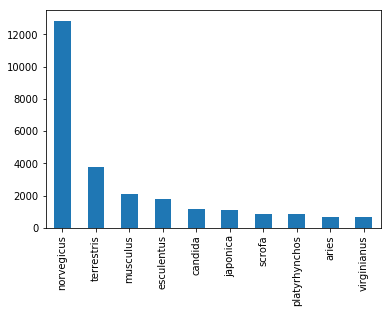

In [99]:
top_10_species.plot.bar()